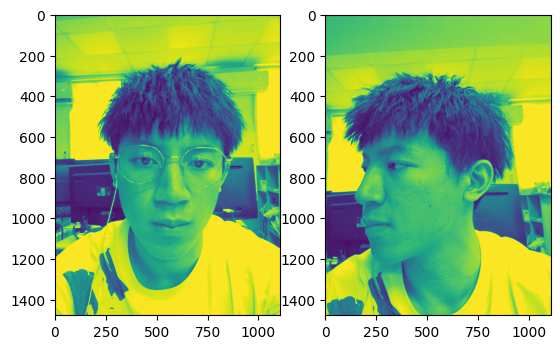

In [120]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 讀取圖檔
img1 = cv2.imread('source/selfie1.jpg',0)
img2 = cv2.imread('source/selfie2.jpg',0)

plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()

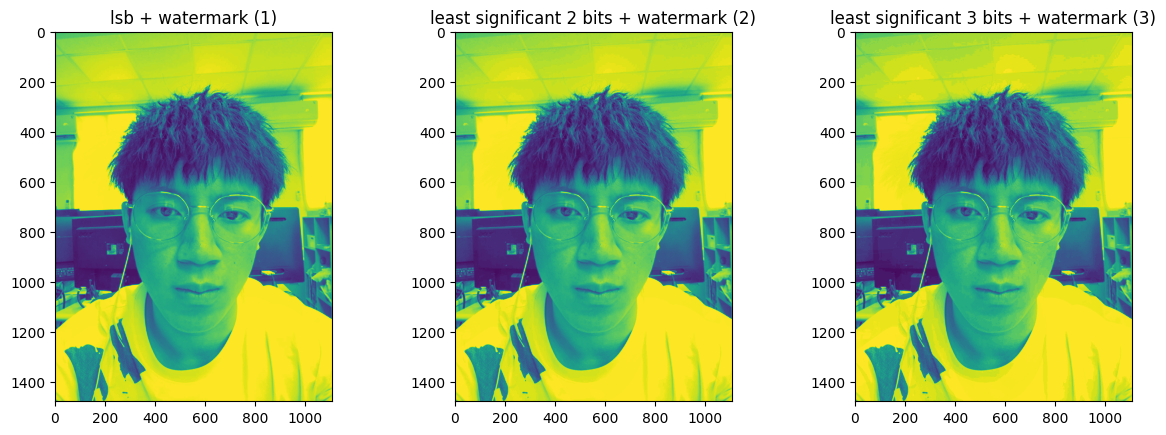

In [121]:
height, width = img1.shape[:2]
lsb1bit_img1_watermark = img1.copy()
lsb2bit_img1_watermark = img1.copy()
lsb3bit_img1_watermark = img1.copy()
watermark = img2.copy()

for x in range(width):
    for y in range(height):
        lsb1bit_img1_watermark[y,x] = (img1[y,x] & 0b11111110) | ((watermark[y,x] & 0b10000000)>>7) # least significant 1 bits + watermark
        lsb2bit_img1_watermark[y,x] = (img1[y,x] & 0b11111100) | ((watermark[y,x] & 0b11000000)>>6) # least significant 2 bits + watermark
        lsb3bit_img1_watermark[y,x] = (img1[y,x] & 0b11111000) | ((watermark[y,x] & 0b11100000)>>5) # least significant 3 bits + watermark

plt.subplots_adjust(left=None, bottom=None, right=2, top=None,wspace=0, hspace=0)
plt.subplot(1,3,1)
plt.subplot(1,3,1).set_title('lsb + watermark (1)')
plt.imshow(lsb1bit_img1_watermark) 
plt.subplot(1,3,2)
plt.subplot(1,3,2).set_title('least significant 2 bits + watermark (2)')
plt.imshow(lsb2bit_img1_watermark)
plt.subplot(1,3,3)
plt.subplot(1,3,3).set_title('least significant 3 bits + watermark (3)')
plt.imshow(lsb3bit_img1_watermark)
plt.show()

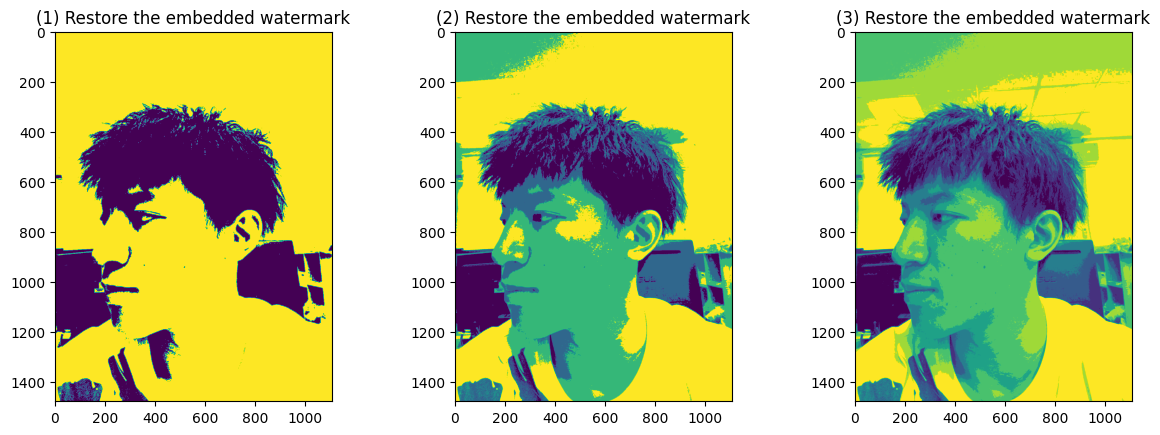

In [122]:
plt.subplots_adjust(left=None, bottom=None, right=2, top=None,wspace=0, hspace=0)
plt.subplot(1,3,1)
plt.subplot(1,3,1).set_title('(1) Restore the embedded watermark')
plt.imshow(lsb1bit_img1_watermark & 0b00000001) # 圖(1)最後 1 bit 圖片裡面藏的浮水印
plt.subplot(1,3,2)
plt.subplot(1,3,2).set_title('(2) Restore the embedded watermark') # 圖(2)最後 2 bits 圖片裡面藏的浮水印
plt.imshow(lsb2bit_img1_watermark  & 0b00000011)
plt.subplot(1,3,3)
plt.subplot(1,3,3).set_title('(3) Restore the embedded watermark') # 圖(3)最後 3 bits 圖片裡面藏的浮水印
plt.imshow(lsb3bit_img1_watermark  & 0b00000111)
plt.show()